# Sentiment analysis training using Naive Bayes Algorithm
Analyse if a movie review was positive or negative.

![alt text](../assets/naive-bayes.webp "Title")

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

### Dataframe

In [3]:
df = pd.read_csv('../datasets/movie-pang02.csv')
df

,class,text
0,Pos,films adapted from comic books have had plent...
1,Pos,every now and then a movie comes along from a...
2,Pos,you ve got mail works alot better than it des...
3,Pos,jaws is a rare film that grabs your atte...
4,Pos,moviemaking is a lot like being the general m...
...,...,...
1995,Neg,if anything stigmata should be taken as...
1996,Neg,john boorman s zardoz is a goofy cinemati...
1997,Neg,the kids in the hall are an acquired taste ...
1998,Neg,there was a time when john carpenter was a gr...


In [4]:
# Checking unique classes
df.nunique()

class       2
text     2000
dtype: int64

In [5]:
# Checking duplicates
df.duplicated().sum()

np.int64(0)

In [6]:
# Checking null values
df.isna().sum()

class    0
text     0
dtype: int64

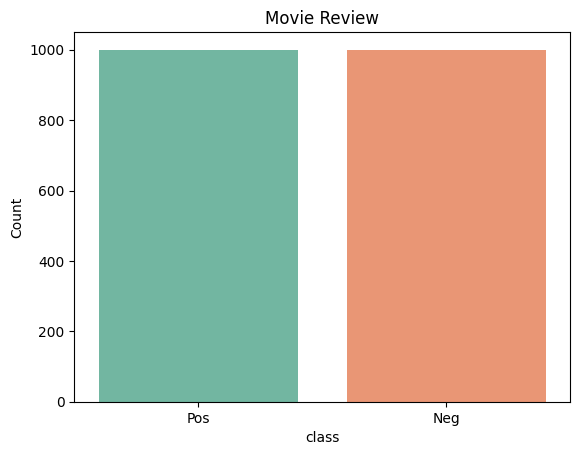

In [7]:
sns.countplot(data=df, x='class', palette='Set2', hue='class')

plt.title('Movie Review')
plt.ylabel('Count')
plt.show()

### Train / Test split

In [8]:
X = df['text']
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Vectorizing reviews

In [9]:
#One-hot vector
vectorizer = CountVectorizer(
  stop_words='english',
  min_df=20,
  token_pattern=r"(?u)\b[a-z]{2,}\b", # Only words with at least 2 characters
  binary=True
)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [10]:
# Checking features (words)
feature_names = vectorizer.get_feature_names_out()
print(f"Number of features: {len(feature_names)}")
feature_names[:100]

Number of features: 3659


array(['abandoned', 'abilities', 'ability', 'able', 'aboard', 'absent',
       'absolute', 'absolutely', 'absurd', 'abuse', 'academy', 'accent',
       'accept', 'acceptable', 'accepts', 'accident', 'accidentally',
       'acclaimed', 'accomplish', 'accomplished', 'according', 'account',
       'accurate', 'accused', 'achieve', 'achieved', 'achievement', 'act',
       'acted', 'acting', 'action', 'actions', 'activities', 'actor',
       'actors', 'actress', 'actresses', 'acts', 'actual', 'actually',
       'ad', 'adam', 'adams', 'adaptation', 'adapted', 'add', 'added',
       'adding', 'addition', 'adds', 'adequate', 'admire', 'admit',
       'admittedly', 'ads', 'adult', 'adults', 'advantage', 'adventure',
       'adventures', 'advice', 'affair', 'affection', 'affleck',
       'aforementioned', 'afraid', 'africa', 'african', 'age', 'aged',
       'agent', 'agents', 'ages', 'aging', 'ago', 'agree', 'agrees',
       'ahead', 'aid', 'aimed', 'ain', 'air', 'airplane', 'airport', 'al',
   

In [11]:
# Checking dataframe
pd.DataFrame(X_train_vec.toarray(), columns=feature_names).iloc[:, :10].head()

,abandoned,abilities,ability,able,aboard,absent,absolute,absolutely,absurd,abuse
0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0


### Training the model

In [12]:
model = MultinomialNB(alpha=1) # Start every feature with value 1
model.fit(X_train_vec, y_train)

MultinomialNB(alpha=1)

### Testing the model against test data

In [13]:
y_pred = model.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("----------------------------------")
print(classification_report(y_test, y_pred))

Accuracy: 0.815
----------------------------------
              precision    recall  f1-score   support

         Neg       0.80      0.85      0.82       201
         Pos       0.83      0.78      0.81       199

    accuracy                           0.81       400
   macro avg       0.82      0.81      0.81       400
weighted avg       0.82      0.81      0.81       400



### Confusion Matrix

Text(0.5, 36.72222222222221, 'Predicted')

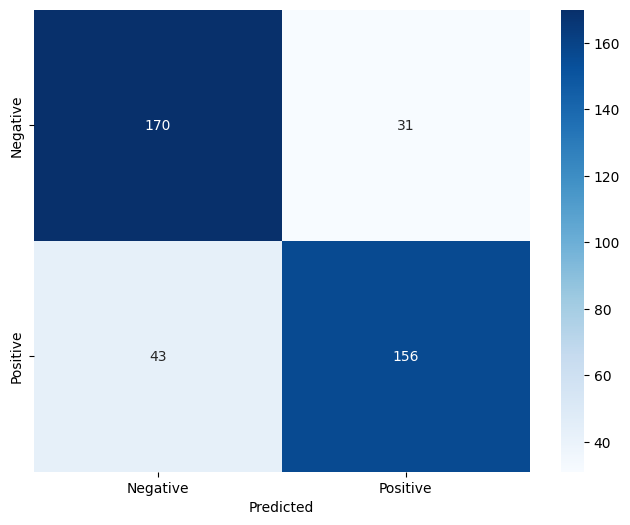

In [14]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')